<a href="https://colab.research.google.com/github/utkarsh-bhar/Kaggle-Competition-Income-Prediction/blob/master/Income-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tcd ml 2019-20 income prediction test (without labels).csv to tcd ml 2019-20 income prediction test (without labels).csv
Saving tcd ml 2019-20 income prediction training (with labels).csv to tcd ml 2019-20 income prediction training (with labels).csv


In [0]:

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline



In [5]:
train_data = pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv')
test_data = pd.read_csv('tcd ml 2019-20 income prediction test (without labels).csv')
print(train_data.keys())
print(test_data.keys())

Index(['Instance', 'Year of Record', 'Gender', 'Age', 'Country',
       'Size of City', 'Profession', 'University Degree', 'Wears Glasses',
       'Hair Color', 'Body Height [cm]', 'Income in EUR'],
      dtype='object')
Index(['Instance', 'Year of Record', 'Gender', 'Age', 'Country',
       'Size of City', 'Profession', 'University Degree', 'Wears Glasses',
       'Hair Color', 'Body Height [cm]', 'Income'],
      dtype='object')


# Exploratory Data Analysis
### Getting an overview of data:


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111993 entries, 0 to 111992
Data columns (total 12 columns):
Instance             111993 non-null int64
Year of Record       111552 non-null float64
Gender               104561 non-null object
Age                  111499 non-null float64
Country              111993 non-null object
Size of City         111993 non-null int64
Profession           111671 non-null object
University Degree    104623 non-null object
Wears Glasses        111993 non-null int64
Hair Color           104751 non-null object
Body Height [cm]     111993 non-null int64
Income in EUR        111993 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.3+ MB


We can see the COUNTRY, PROFESSION, UNIVERSITY DEGREE and GENDER are Objects, so we will encode them to integers

Let's check if there are any NaN values in our data.

In [7]:
print("Are There Missing Data? :",train_data.isnull().any().any())
print(train_data.isnull().sum())

Are There Missing Data? : True
Instance                0
Year of Record        441
Gender               7432
Age                   494
Country                 0
Size of City            0
Profession            322
University Degree    7370
Wears Glasses           0
Hair Color           7242
Body Height [cm]        0
Income in EUR           0
dtype: int64


**We can see there is a lot of null values in our data.**

Now we'll analyze the Income

In [0]:
train_data['Income in EUR'].describe()

count    1.119930e+05
mean     1.092138e+05
std      1.498024e+05
min     -5.696906e+03
25%      3.077169e+04
50%      5.733917e+04
75%      1.260936e+05
max      5.285252e+06
Name: Income in EUR, dtype: float64

We can see that the minimum value is below zero, but we'll treat it as normal data as it has been mentioned to us in the guidelines.

In [0]:
train_plot = train_data.drop(['Instance'], axis=1)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


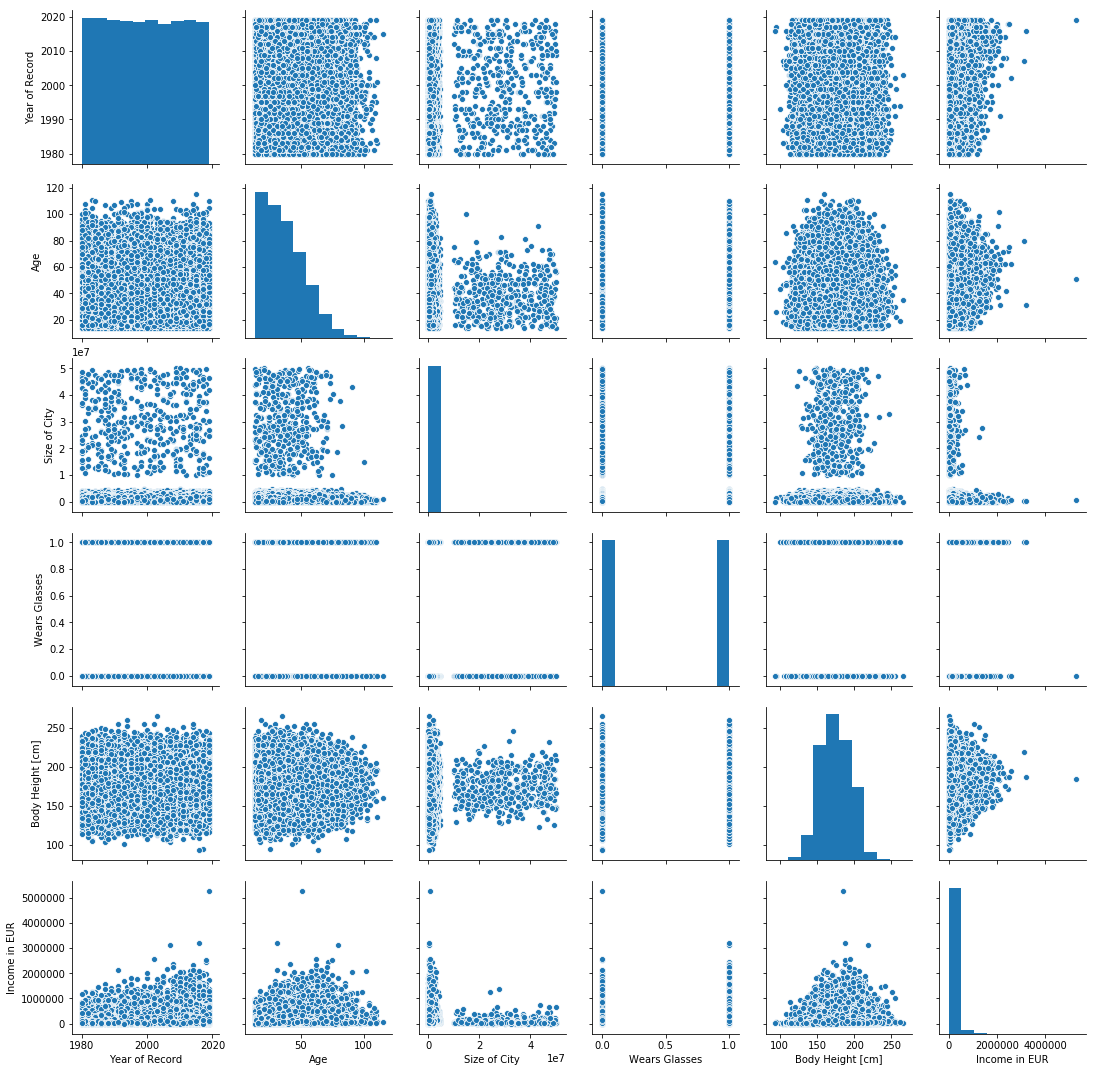

In [0]:
#histogram
sns.pairplot(train_plot);

We can infer from the plot that the Income is increasing with the Year of record.
We can drop the Height and Wear Glasses parameter as they are not responsible for the income change

**Further we will make a Correlation Matrix to further investigate our data.**

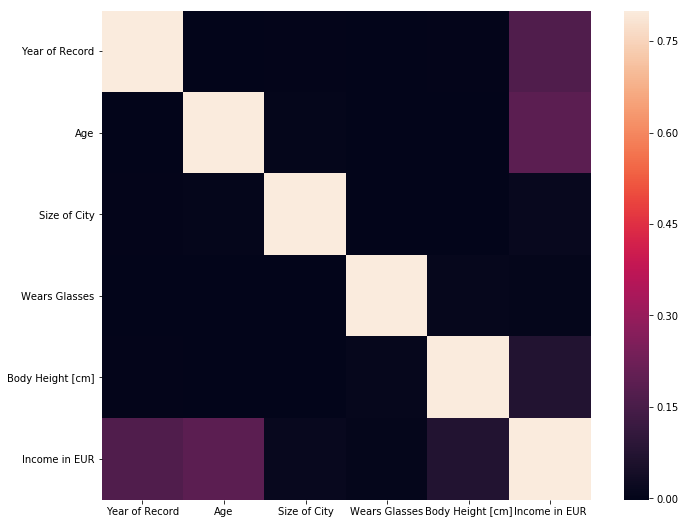

In [0]:
corrmat = train_plot.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

We can infer from the above matrix that Age,Body Height,and year of record has some correlation with the Income.
We'll futher analyze or Matrix

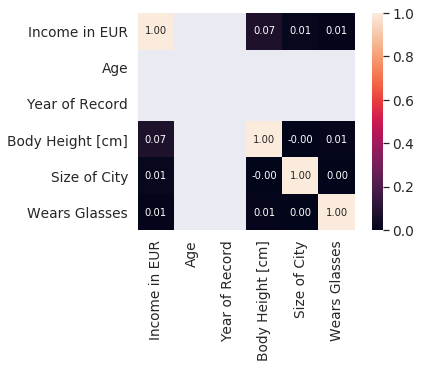

In [0]:
#saleprice correlation matrix
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Income in EUR')['Income in EUR'].index
cm = np.corrcoef(train_plot[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can see that the Body height is slightly correlated with the Income.

In [0]:
train_data.keys()

Index(['Instance', 'Year of Record', 'Gender', 'Age', 'Country',
       'Size of City', 'Profession', 'University Degree', 'Wears Glasses',
       'Hair Color', 'Body Height [cm]', 'Income in EUR'],
      dtype='object')

We'll drop the Hair Colour and Wear Glasses Column from our data.

In [0]:
train_data = train_data.drop(columns=['Wears Glasses','Hair Color'])
test_data = test_data.drop(columns=['Wears Glasses','Hair Color'])

### Handling the missing values.

In [0]:
train_data = train_data.fillna(train_data.mean())
test_data = test_data.fillna(test_data.mean())
train_data = train_data.fillna(method = "ffill")
test_data = test_data.fillna(method ="ffill")



In [17]:
train_data.isnull().sum()

Instance             0
Year of Record       0
Gender               0
Age                  0
Country              0
Size of City         0
Profession           0
University Degree    0
Body Height [cm]     0
dtype: int64

In [18]:
test_data.isnull().sum()

Year of Record       0
Gender               0
Age                  0
Country              0
Size of City         0
Profession           0
University Degree    0
Body Height [cm]     0
dtype: int64

In [0]:
y = train_data['Income in EUR'].values
train_data.drop(['Income in EUR','Instance'],axis = 1 , inplace=True)
train_data.head()

In [0]:
train.Profession.describe()

count         111993
unique          1340
top       pipefitter
freq             261
Name: Profession, dtype: object

We can see that Profession Column in our data is with High Cardinality.
We can Use one Hot encoding for that but that will increase the number of columns in our data by 1340.

We will try to do Target Encoding to encode the data.
Target encoding is the process of replacing a categorical value with the mean of the target variable. Any non-categorical columns are automatically dropped by the target encoder model. 

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb

In [0]:
class TargetEncoder(BaseEstimator, TransformerMixin):
    """Target encoder.
    
    Replaces categorical column(s) with the mean target value for
    each category.

    """
    
    def __init__(self, cols=None):
        """Target encoder
        
        Parameters
        ----------
        cols : list of str
            Columns to target encode.  Default is to target 
            encode all categorical columns in the DataFrame.
        """
        if isinstance(cols, str):
            self.cols = [cols]
        else:
            self.cols = cols
        
        
    def fit(self, X, y):
        """Fit target encoder to X and y
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : encoder
            Returns self.
        """
        
        # Encode all categorical cols by default
        if self.cols is None:
            self.cols = [col for col in X 
                         if str(X[col].dtype)=='object']

        # Check columns are in X
        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')

        # Encode each element of each column
        self.maps = dict() #dict to store map for each column
        for col in self.cols:
            tmap = dict()
            uniques = X[col].unique()
            for unique in uniques:
                tmap[unique] = y[X[col]==unique].mean()
            self.maps[col] = tmap
            
        return self

        
    def transform(self, X, y=None):
        """Perform the target encoding transformation.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
            
        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        Xo = X.copy()
        for col, tmap in self.maps.items():
            vals = np.full(X.shape[0], np.nan)
            for val, mean_target in tmap.items():
                vals[X[col]==val] = mean_target
            Xo[col] = vals
        return Xo
            
            
    def fit_transform(self, X, y=None):
        """Fit and transform the data via target encoding.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        return self.fit(X, y).transform(X, y)

In [31]:
train_data.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Body Height [cm]
0,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,193
1,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,186
2,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,170
3,2006.0,other,33.0,Cuba,751903,fleet assistant,No,171
4,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,188


In [30]:
test_data.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Body Height [cm]
0,1992.0,other,21.0,Honduras,391652,senior project analyst,Master,153
1,1986.0,other,34.0,Kyrgyzstan,33653,greeter,Bachelor,163
2,1994.0,unknown,53.0,Portugal,34765,liaison,Bachelor,153
3,1984.0,0,29.0,Uruguay,1494132,occupational therapist,No,154
4,2007.0,other,17.0,Serbia,120661,portfolio manager,No,191


Preparing Data for Encoding

In [0]:
test_data.drop(['Income','Instance'],axis = 1,inplace=True)

In [14]:
test_data.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm]
0,1992.0,other,21.0,Honduras,391652,senior project analyst,Master,1,Brown,153
1,1986.0,other,34.0,Kyrgyzstan,33653,greeter,Bachelor,0,Black,163
2,1994.0,unknown,53.0,Portugal,34765,liaison,Bachelor,1,Blond,153
3,1984.0,0,29.0,Uruguay,1494132,occupational therapist,No,0,Black,154
4,2007.0,other,17.0,Serbia,120661,portfolio manager,No,0,Red,191


Fitting and tranforming data with TargetEncoder.

In [32]:
te = TargetEncoder()
X_target_encoded = te.fit_transform(train_data, y)
test_target_encoded = te.transform(test_data)
X_target_encoded.sample(10)

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Body Height [cm]
10828,1988.0,100440.196417,49.0,38641.606723,1195626,149644.737732,100271.664012,153
78930,2007.0,111893.379224,21.0,239513.861520,533959,91857.803525,107944.155493,200
48214,2008.0,111893.379224,43.0,25917.123585,2610848,122043.255348,107944.155493,175
11695,2011.0,112036.693653,51.0,181527.254450,709189,89274.940736,100271.664012,198
98300,1996.0,100440.196417,15.0,214891.035605,1962888,122924.046495,114798.183987,163
51303,2019.0,112036.693653,35.0,72456.637443,163216,111468.167240,127358.754323,178
37665,2008.0,111893.379224,69.0,38641.606723,2755708,140513.174396,114798.183987,171
73847,2000.0,112036.693653,32.0,169216.584264,943010,137678.705409,100271.664012,163
52270,2015.0,100440.196417,26.0,38641.606723,33348,76553.879954,114798.183987,192
39599,1981.0,111893.379224,19.0,26691.192820,464065,105035.898431,100271.664012,180


### Scaling the data using StandardScaler
We use Scaling techniques to reduce the spread of the data.

In [0]:
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 train_1 = pd.DataFrame(scaler.fit_transform(X_target_encoded), columns=X_target_encoded.columns)
 test = pd.DataFrame(scaler.fit_transform(test_target_encoded), columns=test_target_encoded.columns)


In [0]:
train_1.fillna(train_1.mean(),inplace=True)
test.fillna(test.mean(),inplace=True)


In [38]:
train_1.isna().sum()

Year of Record       0
Gender               0
Age                  0
Country              0
Size of City         0
Profession           0
University Degree    0
Body Height [cm]     0
dtype: int64

In [39]:
test.isna().sum()

Year of Record       0
Gender               0
Age                  0
Country              0
Size of City         0
Profession           0
University Degree    0
Body Height [cm]     0
dtype: int64

### Splitting the data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_1, y, test_size=0.2, random_state=42)

### Cross Validation 

In [0]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_1.values)
    rmse= np.sqrt(-cross_val_score(model, train_1.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Modelling different Regressors

In [0]:
lr = LinearRegression()

In [0]:
GBoost = GradientBoostingRegressor()


In [0]:
model_lgb = lgb.LGBMRegressor()

In [0]:
model_xgb = xgb.XGBRegressor()

In [0]:
rand_forest = RandomForestRegressor()

In [0]:
model_cat = CatBoostRegressor(learning_rate=0.6)

In [51]:
score = rmsle_cv(lr)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 78083.3074 (2088.5438)



In [52]:
score = rmsle_cv(GBoost)
print("\nGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GBoost score: 60011.9240 (2209.9668)



In [53]:
score = rmsle_cv(model_lgb)
print("\n Lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


 Lightgbm: 57055.1038 (1785.9540)



In [54]:
score = rmsle_cv(rand_forest)
print("\n Random Forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de


 Random Forest: 62944.4686 (2059.2735)



In [62]:
score = rmsle_cv(model_cat)
print("\n cat_boost Score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

0:	learn: 97156.0049770	total: 58.8ms	remaining: 58.8s
1:	learn: 77536.2574623	total: 69.7ms	remaining: 34.8s
2:	learn: 69454.8607070	total: 79.9ms	remaining: 26.6s
3:	learn: 65865.8934627	total: 89.3ms	remaining: 22.2s
4:	learn: 63776.1994053	total: 98.9ms	remaining: 19.7s
5:	learn: 63034.1656120	total: 109ms	remaining: 18s
6:	learn: 62793.1515648	total: 118ms	remaining: 16.8s
7:	learn: 61471.0027971	total: 128ms	remaining: 15.8s
8:	learn: 60622.7761491	total: 137ms	remaining: 15.1s
9:	learn: 60492.8666601	total: 146ms	remaining: 14.4s
10:	learn: 60323.7324117	total: 155ms	remaining: 13.9s
11:	learn: 60062.5882755	total: 163ms	remaining: 13.5s
12:	learn: 59384.2385417	total: 173ms	remaining: 13.1s
13:	learn: 58872.5429190	total: 182ms	remaining: 12.8s
14:	learn: 58675.9410214	total: 191ms	remaining: 12.5s
15:	learn: 58241.6815115	total: 199ms	remaining: 12.3s
16:	learn: 57898.5325027	total: 207ms	remaining: 12s
17:	learn: 57678.4666779	total: 215ms	remaining: 11.7s
18:	learn: 57340.65

In [0]:
def rmsle(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))


### Since the LightGBM and Catboost are performing good. We'll train these models.

In [70]:
model_lgb.fit(X_train,y_train)
lgb_pred = model_lgb.predict(X_test)
submission_lgb = model_lgb.predict(test)
print(rmsle(lgb_pred, y_test))



57358.600470390236


### Upon Submission Catboost is performing better than the LightGBM algorithm.

In [75]:
model_cat.fit(X_train,y_train)
cat_pred_train = model_cat.predict(X_train)
cat_pred = model_cat.predict(X_test)
submission_cat = model_cat.predict(test)
print(rmsle(cat_pred, y_test))

0:	learn: 96972.9648681	total: 9.57ms	remaining: 9.56s
1:	learn: 77492.0767697	total: 18.6ms	remaining: 9.28s
2:	learn: 70296.7371273	total: 27.2ms	remaining: 9.04s
3:	learn: 66303.3415767	total: 35.5ms	remaining: 8.83s
4:	learn: 63941.8539084	total: 43.7ms	remaining: 8.69s
5:	learn: 63682.6198397	total: 51ms	remaining: 8.44s
6:	learn: 62851.2155278	total: 59.8ms	remaining: 8.48s
7:	learn: 62106.0021973	total: 68.2ms	remaining: 8.45s
8:	learn: 61200.5249344	total: 76.4ms	remaining: 8.41s
9:	learn: 60681.5981778	total: 84.8ms	remaining: 8.39s
10:	learn: 59966.0469281	total: 92.9ms	remaining: 8.35s
11:	learn: 59358.6560919	total: 101ms	remaining: 8.32s
12:	learn: 58779.2413015	total: 109ms	remaining: 8.31s
13:	learn: 58334.0043397	total: 119ms	remaining: 8.35s
14:	learn: 58294.9711205	total: 125ms	remaining: 8.2s
15:	learn: 58051.3387431	total: 134ms	remaining: 8.24s
16:	learn: 57867.5600696	total: 143ms	remaining: 8.24s
17:	learn: 57631.3670050	total: 151ms	remaining: 8.24s
18:	learn: 5

In [0]:
pd.DataFrame(submission_cat).to_csv("lgb_train_pred.csv")
from google.colab import files
files.download("lgb_train_pred.csv")